# <img src="world_factbook.png" alt="Drawing" style="width: 50px;"/> CIA Factbook (Tidy Tuesday, Week 43)

This week, we explore the CIA World Factbook, which provides basic intelligence for over 250 countries.

## Libraries and Data

In [166]:
# Libraries, Data and Fonts
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from scipy.spatial.distance import squareform
from matplotlib.font_manager import fontManager, FontProperties

# Data
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-10-22/cia_factbook.csv"
ciaFactbook = pd.read_csv(url)

# Fonts
path = "C:/pathTo/Fonts/RobotoCondensed-Regular.ttf"
pathBold = "C:/pathTo/Fonts/RobotoCondensed-Bold.ttf"
fontManager.addfont(path)
fontManager.addfont(pathBold)
prop = FontProperties(fname = path)
propBold = FontProperties(fname = pathBold)

## Data Exploration

In [167]:
## Summary Statistics
print("Summary Statistics")
print("------------------")
print(ciaFactbook.describe())

Summary Statistics
------------------
               area  birth_rate  death_rate  infant_mortality_rate  \
count  2.570000e+02  224.000000  225.000000             224.000000   
mean   5.308881e+05   19.659063    7.906978              24.484420   
std    1.696869e+06    9.669575    2.979933              24.077809   
min    0.000000e+00    6.720000    1.530000               1.810000   
25%    6.160000e+02   11.840000    5.930000               6.185000   
50%    5.119700e+04   16.890000    7.630000              13.985000   
75%    3.381450e+05   24.915000    9.450000              38.655000   
max    1.709824e+07   46.120000   17.490000             117.230000   

       internet_users  life_exp_at_birth  maternal_mortality_rate  \
count    2.130000e+02         224.000000               184.000000   
mean     8.311771e+06          71.826875               177.972826   
std      3.350725e+07           8.798460               262.508297   
min      4.640000e+02          49.440000               

In [168]:
## Missing Values
print("Missing Values")
print("--------------")
print(ciaFactbook.isnull().sum())

Missing Values
--------------
country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64


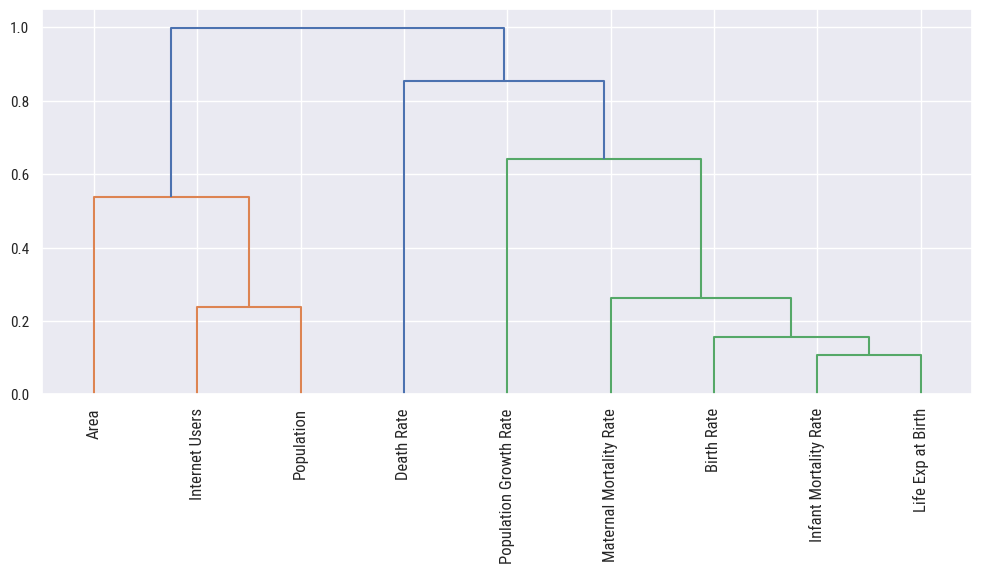

In [169]:
## Correlation Matrix
ciaFactbookFiltered = ciaFactbook.drop("country", axis = 1)    # Drop country column (string)
ciaFactbookFiltered = ciaFactbookFiltered.drop("net_migration_rate", axis = 1)

## Rename Columns 
ciaFactbookFiltered = ciaFactbookFiltered.rename(columns = {"area":"Area", "internet_users":"Internet Users", "population":"Population", 
                                                            "death_rate":"Death Rate", "population_growth_rate":"Population Growth Rate", 
                                                            "maternal_mortality_rate":"Maternal Mortality Rate", "birth_rate":"Birth Rate", 
                                                            "infant_mortality_rate":"Infant Mortality Rate", "life_exp_at_birth":"Life Exp at Birth"}
                                                )
ciaFactbookCorr = ciaFactbookFiltered.corr()

## Upper Triange of Correlation Matrix
upperTriangleCIA = np.triu(ciaFactbookCorr)

## Cluster via @sgalella on Kaggle (https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering)
plt.figure(figsize = (12, 5))
dissimilarity = 1 - abs(ciaFactbookCorr)
Z = linkage(squareform(dissimilarity), "complete")

dendrogram(Z, labels = ciaFactbookFiltered.columns, orientation = "top", leaf_rotation = 90)

threshold = 0.8
labels = fcluster(Z, threshold, criterion = "distance")

labels_order = np.argsort(labels)

for idx, i in enumerate(ciaFactbookFiltered.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(ciaFactbookFiltered[i])
    else:
        df_to_append = pd.DataFrame(ciaFactbookFiltered[i])
        clustered = pd.concat([clustered, df_to_append], axis = 1)

## Data Visualization

<Figure size 1000x1000 with 0 Axes>

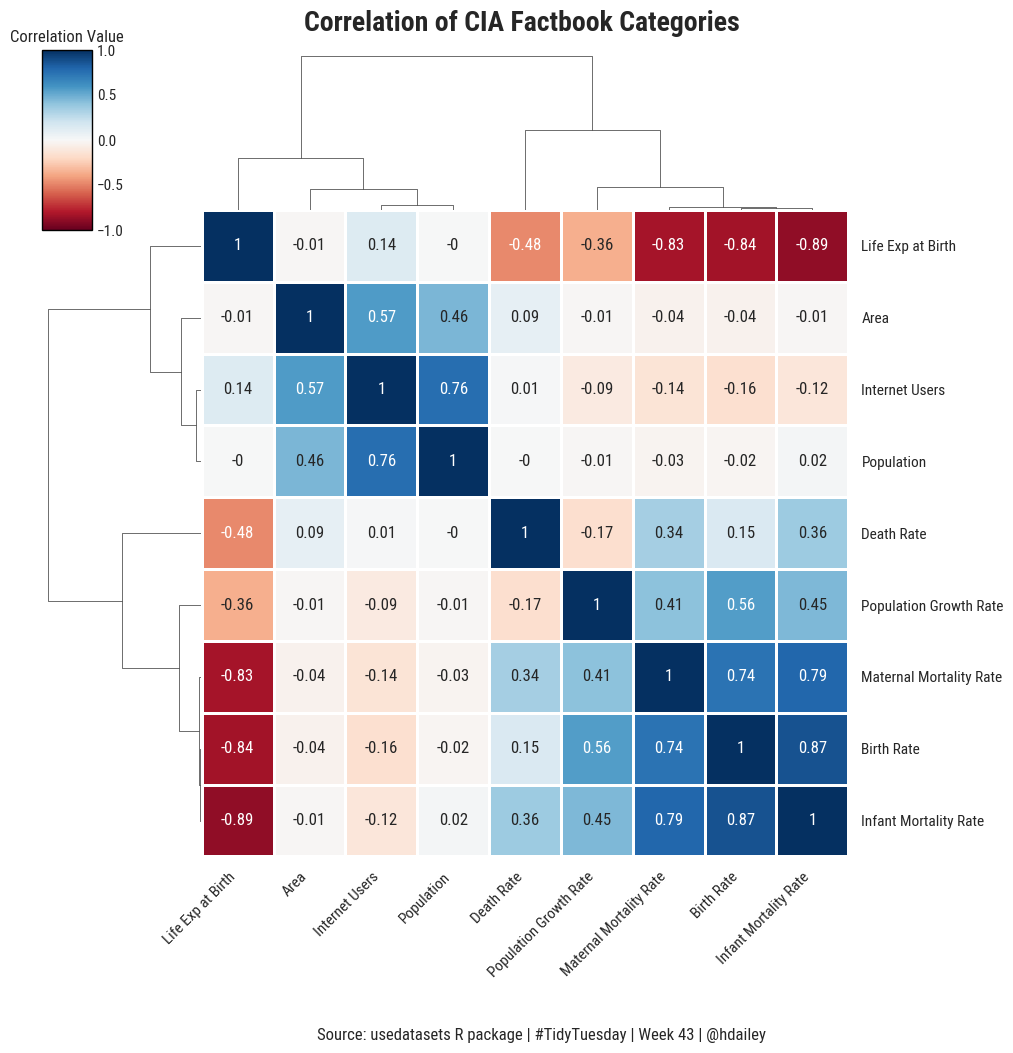

In [170]:
## Plot Correlation Matrix via @sgalella on Kaggle (https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering)
sns.set(font = prop.get_name())

plt.figure(figsize = (10, 10))
correlations = clustered.corr()
rel = sns.clustermap(round(correlations, 2), 
                     method = "complete", 
                     metric = "correlation", 
                     cmap = "RdBu", 
                     annot = True, 
                     vmin = -1, 
                     vmax = 1,
                     linewidth = 1)

plt.suptitle("Correlation of CIA Factbook Categories", y = 1.02, size = 20, fontweight = "bold")
plt.setp(rel.ax_heatmap.xaxis.get_majorticklabels(), rotation = 45, ha = "right")
rel.ax_heatmap.tick_params(bottom = False, right = False)
plt.text(10, -10, "Source: usedatasets R package | #TidyTuesday | Week 43 | @hdailey", ha = "center")
rel.ax_cbar.set_title("Correlation Value")
rel.ax_cbar.tick_params(size = 0)

for spine in rel.ax_cbar.spines:
    rel.ax_cbar.spines[spine].set_color("black")
    rel.ax_cbar.spines[spine].set_linewidth(1)

plt.show()

## Export Figure

In [171]:
rel.savefig("2024-10-23_TT.png")